In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import combinations
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df_train = pd.read_csv("train_data.csv")
df_test = pd.read_csv("test_data.csv")
df_train.head()

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,"8,79",1,"3,86",68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,224517.0,Brass: Birmingham,2018.0,2,4,120,14,19217,"8,66",3,"3,91",28785.0,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
2,167791.0,Terraforming Mars,2016.0,1,5,120,12,64864,"8,43",4,"3,24",87099.0,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
3,233078.0,Twilight Imperium: Fourth Edition,2017.0,3,6,480,14,13468,"8,70",5,"4,22",16831.0,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"
4,291457.0,Gloomhaven: Jaws of the Lion,2020.0,1,4,120,14,8392,"8,87",6,"3,55",21609.0,"Action Queue, Campaign / Battle Card Driven, C...","Strategy Games, Thematic Games"


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15257 entries, 0 to 15256
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  15247 non-null  float64
 1   Name                15257 non-null  object 
 2   Year Published      15256 non-null  float64
 3   Min Players         15257 non-null  int64  
 4   Max Players         15257 non-null  int64  
 5   Play Time           15257 non-null  int64  
 6   Min Age             15257 non-null  int64  
 7   Users Rated         15257 non-null  int64  
 8   Rating Average      15257 non-null  object 
 9   BGG Rank            15257 non-null  int64  
 10  Complexity Average  15257 non-null  object 
 11  Owned Users         15240 non-null  float64
 12  Mechanics           14057 non-null  object 
 13  Domains             7608 non-null   object 
dtypes: float64(3), int64(6), object(5)
memory usage: 1.6+ MB


In [4]:
df_train['Mechanics'] = df_train['Mechanics'].fillna('Unknown')
df_train['Domains'] = df_train['Domains'].fillna('Unknown')

df_test['Mechanics'] = df_test['Mechanics'].fillna('Unknown')
df_test['Domains'] = df_test['Domains'].fillna('Unknown')

df_train['Rating Average'] = df_train['Rating Average'].str.replace(',', '.')
df_train['Rating Average num'] = df_train['Rating Average'].astype(float)

df_train['Complexity Average'] = df_train['Complexity Average'].str.replace(',', '.')
df_train['Complexity Average num'] = df_train['Complexity Average'].astype(float)

df_test['Complexity Average'] = df_test['Complexity Average'].str.replace(',', '.')
df_test['Complexity Average num'] = df_test['Complexity Average'].astype(float)

In [5]:
tmp_test_m = df_test['Mechanics'].str.get_dummies(sep=',')
tmp_test_m = tmp_test_m.add_prefix('Mechanics_').reset_index(drop=True)

tmp_test_d = df_test['Domains'].str.get_dummies(sep=',')
tmp_test_d = tmp_test_d.add_prefix('Domains_').reset_index(drop=True)

In [6]:
tmp_m = df_train['Mechanics'].str.get_dummies(sep=',')
tmp_m = tmp_m.add_prefix('Mechanics_').reset_index(drop=True)

cols_m = [col for col in tmp_m if col.startswith('Mechanics_')]
print(cols_m)
print(len(cols_m))

for col in tmp_m[cols_m]:
  corr = df_train['Rating Average num'].corr(tmp_m[col])
  if abs(corr) < 0.10 or col not in tmp_test_m:
    cols_m.remove(col)

print(cols_m)
print(len(cols_m))

df_train = pd.concat([df_train, tmp_m[cols_m]], axis=1)
df_test = pd.concat([df_test, tmp_test_m[cols_m]], axis=1)

['Mechanics_ Action Points', 'Mechanics_ Action Queue', 'Mechanics_ Action Retrieval', 'Mechanics_ Action/Event', 'Mechanics_ Advantage Token', 'Mechanics_ Alliances', 'Mechanics_ Area Majority / Influence', 'Mechanics_ Area Movement', 'Mechanics_ Area-Impulse', 'Mechanics_ Auction/Bidding', 'Mechanics_ Auction: Dexterity', 'Mechanics_ Auction: Dutch', 'Mechanics_ Auction: Dutch Priority', 'Mechanics_ Auction: English', 'Mechanics_ Auction: Fixed Placement', 'Mechanics_ Auction: Once Around', 'Mechanics_ Auction: Sealed Bid', 'Mechanics_ Auction: Turn Order Until Pass', 'Mechanics_ Automatic Resource Growth', 'Mechanics_ Betting and Bluffing', 'Mechanics_ Bias', 'Mechanics_ Bingo', 'Mechanics_ Bribery', 'Mechanics_ Campaign / Battle Card Driven', 'Mechanics_ Card Drafting', 'Mechanics_ Card Play Conflict Resolution', 'Mechanics_ Catch the Leader', 'Mechanics_ Chaining', 'Mechanics_ Chit-Pull System', 'Mechanics_ Closed Economy Auction', 'Mechanics_ Command Cards', 'Mechanics_ Commodity

In [7]:
tmp_d = df_train['Domains'].str.get_dummies(sep=',')
tmp_d = tmp_d.add_prefix('Domains_').reset_index(drop=True)

cols_d = [col for col in tmp_d if col.startswith('Domains_')]
print(cols_d)
print(len(cols_d))

for col in tmp_d[cols_d]:
  corr = df_train['Rating Average num'].corr(tmp_d[col])
  if abs(corr) < 0.10 or col not in tmp_test_d:
    cols_d.remove(col)

print(cols_d)
print(len(cols_d))

df_train = pd.concat([df_train, tmp_d[cols_d]], axis=1)
df_test = pd.concat([df_test, tmp_test_d[cols_d]], axis=1)

["Domains_ Children's Games", 'Domains_ Customizable Games', 'Domains_ Family Games', 'Domains_ Party Games', 'Domains_ Strategy Games', 'Domains_ Thematic Games', 'Domains_ Wargames', 'Domains_Abstract Games', "Domains_Children's Games", 'Domains_Customizable Games', 'Domains_Family Games', 'Domains_Party Games', 'Domains_Strategy Games', 'Domains_Thematic Games', 'Domains_Unknown', 'Domains_Wargames']
16
["Domains_Children's Games", 'Domains_Strategy Games', 'Domains_Unknown', 'Domains_Wargames']
4


In [16]:
mech = [col for col in df_train.columns if col.startswith('Mechanics_')]
dom = [col for col in df_train.columns if col.startswith('Domains_')]

mech_test = [col for col in df_test.columns if col.startswith('Mechanics_')]
dom_test = [col for col in df_test.columns if col.startswith('Domains_')]

features = ['Users Rated', 'BGG Rank', 'Complexity Average num', 'Min Age', 'Min Players']
feat = features + dom + mech

In [17]:
X = df_train[feat]
y = df_train['Rating Average num']

X_filled = X.fillna(X.median())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filled)

X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

print("="*60)
print("TRAIN:")
print(f'Mean Squared Error: {mean_squared_error(y_train, y_pred_train):.4f}')

print("\n" + "="*60)
print("VALIDATION:")
print(f'Mean Squared Error: {mean_squared_error(y_val, y_pred_val):.4f}')

train_mse = mean_squared_error(y_train, y_pred_train)
val_mse = mean_squared_error(y_val, y_pred_val)
overfitting_gap = abs(train_mse - val_mse) / train_mse * 100

print(f"\nРазница между train и validation: {overfitting_gap:.1f}%")

TRAIN:
Mean Squared Error: 0.3026

VALIDATION:
Mean Squared Error: 0.3189

Разница между train и validation: 5.4%


In [10]:
X_full_train = df_train[feat]
y_full_train = df_train['Rating Average num']
X_test = df_test[feat]

X_filled_train = X_full_train.fillna(X_full_train.median())
X_filled_test = X_test.fillna(X_test.median())

scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_filled_train)
X_scaled_test = scaler.fit_transform(X_filled_test)

model = LinearRegression()
model.fit(X_scaled_train, y_full_train)

y_pred = model.predict(X_scaled_test)

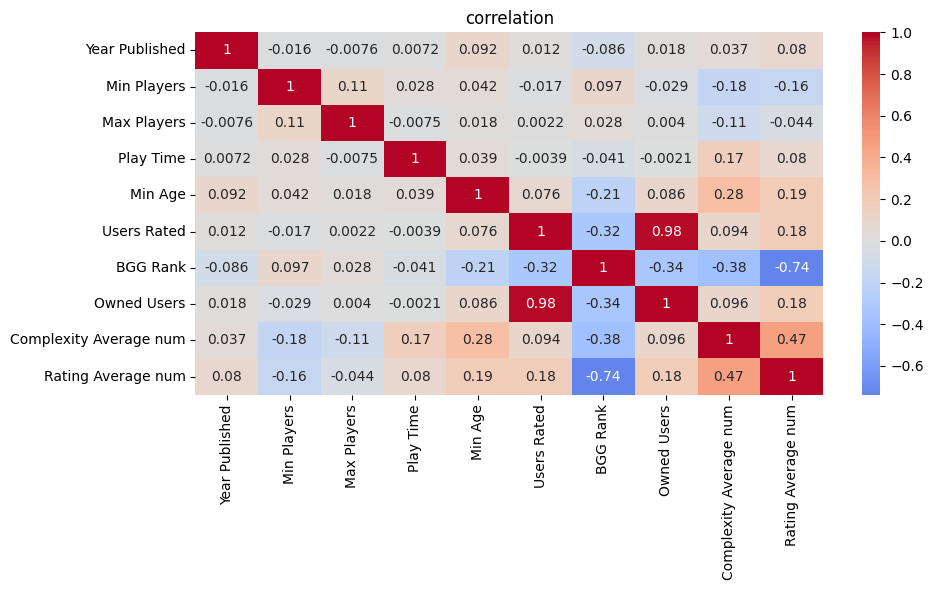

In [11]:
plt.figure(figsize=(10, 6))
corr_matrix = df_train[['Year Published', 'Min Players', 'Max Players', 'Play Time','Min Age', 'Users Rated',
                        'BGG Rank', 'Owned Users', 'Complexity Average num', 'Rating Average num']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('correlation')
plt.tight_layout()
plt.show()

In [12]:
df_vanga = pd.DataFrame({
    'index': df_test.index,
    'Rating Average': y_pred})

df_vanga['Rating Average'] = df_vanga['Rating Average'].round(2)
df_vanga.head()

,index,Rating Average
0,0,7.45
1,1,7.48
2,2,7.92
3,3,7.42
4,4,7.44


In [13]:
import zipfile
from IPython.display import FileLink
df_vanga.to_csv('prediction_dt_3.csv', index=False)
with zipfile.ZipFile('prediction_dz3.zip', 'w') as zipf:
    zipf.write('prediction_dt_3.csv')
